In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# **Preprocessing**

In [30]:
df = pd.read_csv('cleaned_laptop_dataset.csv')

In [31]:
df.shape

(3601, 15)

In [32]:
df.isnull().sum()

Brand               0
Price               0
Processor_Brand     0
RAM_Expandable      0
RAM_Size (GB)       0
RAM_TYPE            0
Processer_speed     0
Display_type        0
GPU_Brand           0
SSD(GB)             0
HDD(GB)             0
Processor_Series    0
Processor_Tier      0
Display_Category    0
GPU_Tier            0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             3601 non-null   object 
 1   Price             3601 non-null   float64
 2   Processor_Brand   3601 non-null   object 
 3   RAM_Expandable    3601 non-null   object 
 4   RAM_Size (GB)     3601 non-null   int64  
 5   RAM_TYPE          3601 non-null   object 
 6   Processer_speed   3601 non-null   float64
 7   Display_type      3601 non-null   object 
 8   GPU_Brand         3601 non-null   object 
 9   SSD(GB)           3601 non-null   int64  
 10  HDD(GB)           3601 non-null   int64  
 11  Processor_Series  3601 non-null   object 
 12  Processor_Tier    3601 non-null   object 
 13  Display_Category  3601 non-null   object 
 14  GPU_Tier          3601 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 422.1+ KB


In [34]:
df['Processor_Brand'] = df['Processor_Brand'].astype('category')
df['Processor_Series'] = df['Processor_Series'].astype('category')
df['Processor_Tier'] = df['Processor_Tier'].astype('category')
df['GPU_Brand'] = df['GPU_Brand'].astype('category')
df['GPU_Tier'] = df['GPU_Tier'].astype('category')
df['RAM_TYPE'] = df['RAM_TYPE'].astype('category')
df['Display_type'] = df['Display_type'].astype('category')
df['Display_Category'] = df['Display_Category'].astype('category')
df['RAM_Expandable'] = df['RAM_Expandable'].astype('category')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Brand             3601 non-null   object  
 1   Price             3601 non-null   float64 
 2   Processor_Brand   3601 non-null   category
 3   RAM_Expandable    3601 non-null   category
 4   RAM_Size (GB)     3601 non-null   int64   
 5   RAM_TYPE          3601 non-null   category
 6   Processer_speed   3601 non-null   float64 
 7   Display_type      3601 non-null   category
 8   GPU_Brand         3601 non-null   category
 9   SSD(GB)           3601 non-null   int64   
 10  HDD(GB)           3601 non-null   int64   
 11  Processor_Series  3601 non-null   category
 12  Processor_Tier    3601 non-null   category
 13  Display_Category  3601 non-null   category
 14  GPU_Tier          3601 non-null   category
dtypes: category(9), float64(2), int64(3), object(1)
memory usage: 202.5+ KB


In [36]:
# Categorical columns
categorical_cols = df.select_dtypes(include=['category']).columns
print("Categorical columns:", list(categorical_cols))

# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", list(numerical_cols))

Categorical columns: ['Processor_Brand', 'RAM_Expandable', 'RAM_TYPE', 'Display_type', 'GPU_Brand', 'Processor_Series', 'Processor_Tier', 'Display_Category', 'GPU_Tier']
Numerical columns: ['Price', 'RAM_Size (GB)', 'Processer_speed', 'SSD(GB)', 'HDD(GB)']


In [37]:
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"{df[col].value_counts()}\n")

Processor_Brand: 3 unique values
Processor_Brand
Intel    2717
AMD       866
Apple      18
Name: count, dtype: int64

RAM_Expandable: 2 unique values
RAM_Expandable
No     1923
Yes    1678
Name: count, dtype: int64

RAM_TYPE: 3 unique values
RAM_TYPE
DDR4    2790
DDR5     653
DDR3     158
Name: count, dtype: int64

Display_type: 2 unique values
Display_type
LCD    1891
LED    1710
Name: count, dtype: int64

GPU_Brand: 4 unique values
GPU_Brand
Intel     1760
NVIDIA    1242
AMD        581
Apple       18
Name: count, dtype: int64

Processor_Series: 18 unique values
Processor_Series
Intel Core I5         1198
Intel Core I3          638
Intel Core I7          593
AMD Ryzen 5            353
AMD Ryzen 7            248
AMD Ryzen 3            113
Intel Celeron           73
Intel Core I9           67
AMD A-Series            59
Intel Pentium           55
Intel Core Ultra 7      49
AMD Ryzen 9             43
Athlon                  34
Intel Core Ultra 5      24
Apple M-series          18
AMD Othe

## **Encode Categorical Columns**

In [38]:

from sklearn.preprocessing import LabelEncoder

# Binary columns
df["RAM_Expandable"] = df["RAM_Expandable"].map({"Yes": 1, "No": 0})
df["Display_type"] = df["Display_type"].map({"LED": 1, "LCD": 0})

# Ordinal columns
processor_tier_order = {"Low-End": 1, "Mid-End": 2, "Upper Mid-End": 3, "High-End": 4, "Apple M-series": 5}
display_category_order = {"Small": 1, "Medium": 2, "Large": 3}
gpu_tier_order = {"Entry-level": 1, "Low-end": 2, "Mid-end": 3, "High-end": 4}
ram_type_order = {
    "DDR3": 1, "LPDDR3": 2, "DDR4": 3,"LPDDR4":4 ,"LPDDR4X": 5, "DDR5": 6,
    "LPDDR5": 7, "LPDDR5X": 8
}


df["Processor_Tier"] = df["Processor_Tier"].map(processor_tier_order)
df["Display_Category"] = df["Display_Category"].map(display_category_order)
df["GPU_Tier"] = df["GPU_Tier"].map(gpu_tier_order)
df["RAM_TYPE"] = df["RAM_TYPE"].map(ram_type_order)

# Label Encoding for ordinal columns
le_brand = LabelEncoder()
le_proc_brand = LabelEncoder()
le_gpu_brand = LabelEncoder()
le_proc_series = LabelEncoder()

df["Brand"] = le_brand.fit_transform(df["Brand"])
df["Processor_Brand"] = le_proc_brand.fit_transform(df["Processor_Brand"])
df["GPU_Brand"] = le_gpu_brand.fit_transform(df["GPU_Brand"])
df["Processor_Series"] = le_proc_series.fit_transform(df["Processor_Series"])

# # One-Hot Encoding for nominal columns
# df = pd.get_dummies(df, columns=['Brand', 'Processor_Brand', 'GPU_Brand', 'Processor_Series'], 
#                            drop_first=True, prefix=['Brand', 'Processor', 'GPU', 'ProcSeries'])



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Brand             3601 non-null   int64   
 1   Price             3601 non-null   float64 
 2   Processor_Brand   3601 non-null   int64   
 3   RAM_Expandable    3601 non-null   category
 4   RAM_Size (GB)     3601 non-null   int64   
 5   RAM_TYPE          3601 non-null   category
 6   Processer_speed   3601 non-null   float64 
 7   Display_type      3601 non-null   category
 8   GPU_Brand         3601 non-null   int64   
 9   SSD(GB)           3601 non-null   int64   
 10  HDD(GB)           3601 non-null   int64   
 11  Processor_Series  3601 non-null   int64   
 12  Processor_Tier    3601 non-null   category
 13  Display_Category  3601 non-null   category
 14  GPU_Tier          3601 non-null   category
dtypes: category(6), float64(2), int64(7)
memory usage: 275.3 KB


In [40]:
df.head()

,Brand,Price,Processor_Brand,RAM_Expandable,RAM_Size (GB),RAM_TYPE,Processer_speed,Display_type,GPU_Brand,SSD(GB),HDD(GB),Processor_Series,Processor_Tier,Display_Category,GPU_Tier
0,5,127011.5,0,1,8,3,4.0,0,0,512,0,3,2,2,2
1,3,274750.0,2,1,16,6,3.3,0,3,512,0,10,2,2,3
2,4,194215.0,2,1,8,3,4.2,0,2,512,0,10,2,2,1
3,7,76965.0,2,0,8,3,1.7,0,2,512,0,9,1,2,1
4,4,173596.5,0,1,8,3,4.0,0,0,512,0,3,2,1,2


## **Heatmap**

In [41]:
#Separate features and target
feature_cols = [col for col in df.columns if col != 'Price'] 
X = df[feature_cols]  # 23 features
y = df['Price']       # 1 target

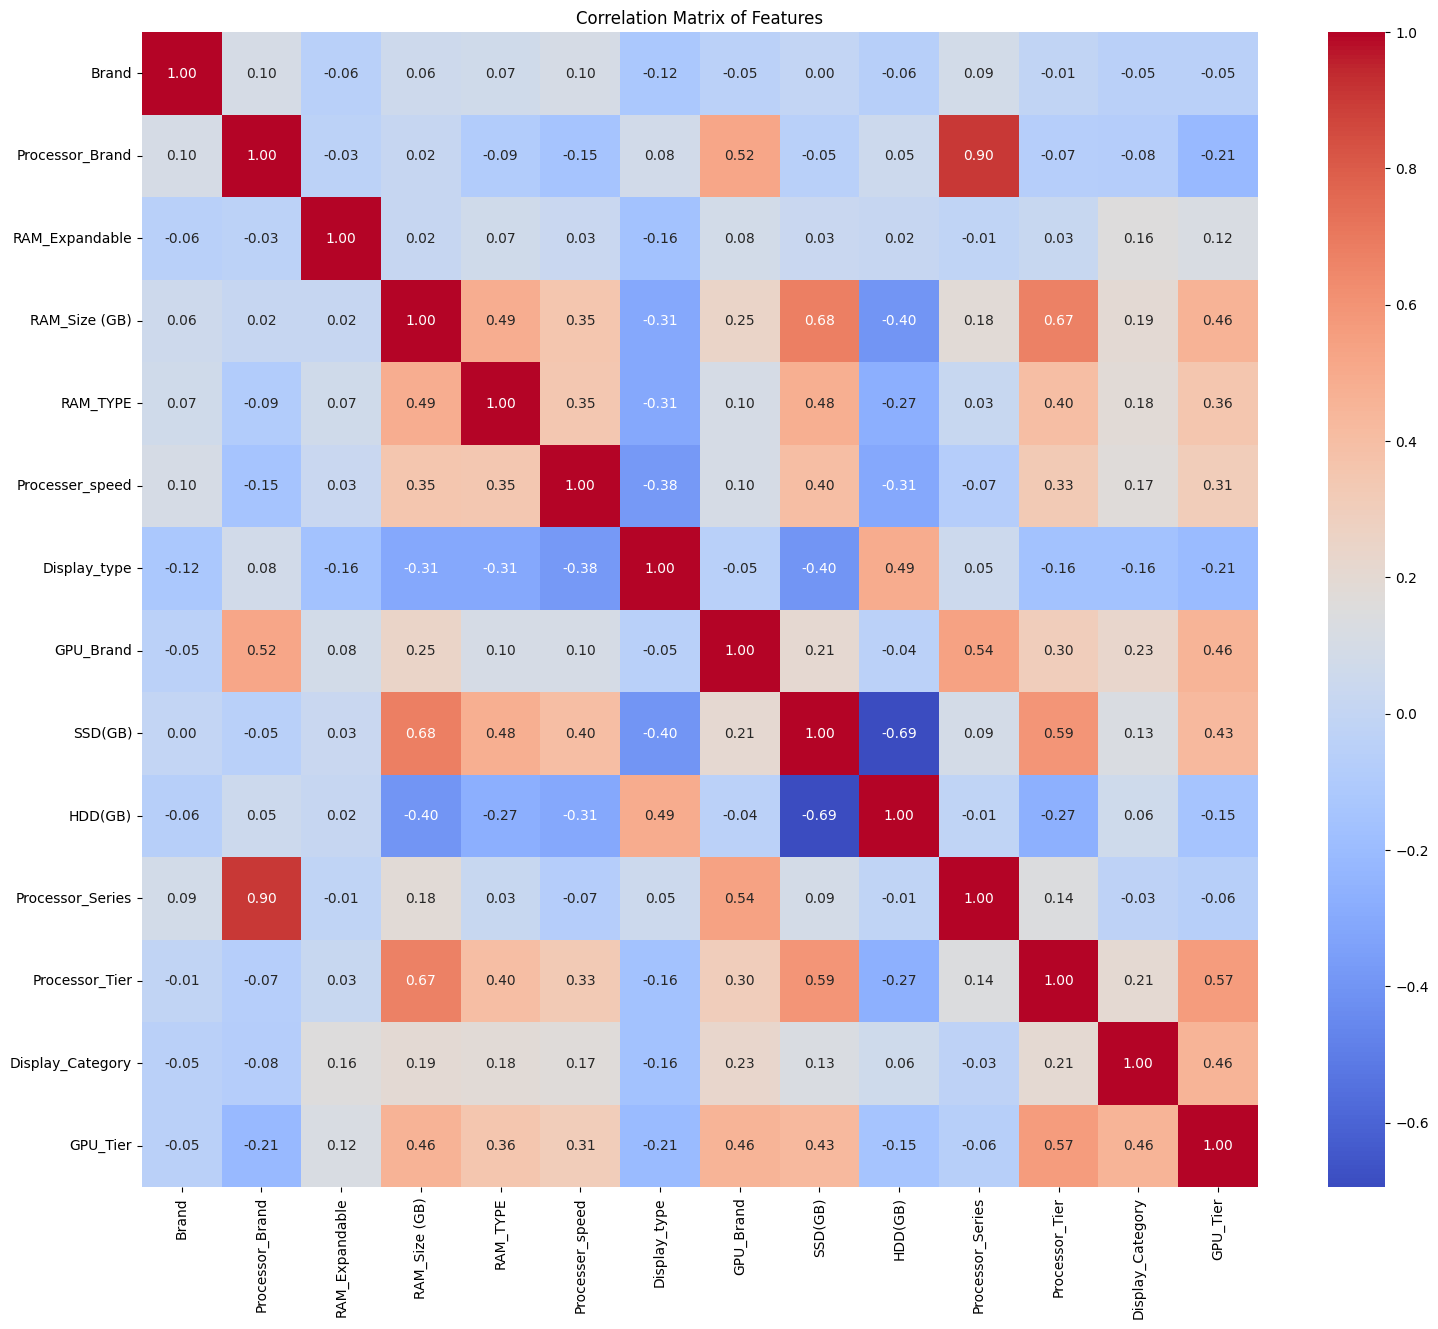

In [42]:
plt.figure(figsize=(18,15))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

In [43]:
import numpy as np

X_vif = X.copy()
# Remove rows with NaN or Inf values
X_vif = X_vif.replace([np.inf, -np.inf], np.nan)  # replace infs with NaN
X_vif = X_vif.dropna()  # drop rows with NaN values


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np


# Keep only numeric columns
X_vif = X_vif.select_dtypes(include=['int64', 'float64', 'category'])

# Handle missing and infinite values
X_vif = X_vif.replace([np.inf, -np.inf], np.nan)
X_vif = X_vif.dropna()

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


             Feature        VIF
10  Processor_Series  52.022892
1    Processor_Brand  34.344420
11    Processor_Tier  17.579459
7          GPU_Brand  13.320770
13          GPU_Tier  11.907342
3      RAM_Size (GB)  11.807036
8            SSD(GB)  11.729492
4           RAM_TYPE  11.647986
12  Display_Category  10.793681
5    Processer_speed   8.615986
9            HDD(GB)   3.216031
0              Brand   2.977525
6       Display_type   2.547440
2     RAM_Expandable   1.959911


# Model Development

### **Split Features and Target**

In [45]:
X = df.drop('Price', axis=1)
y = df['Price']

### Train-Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train Random Forest Regressor

In [47]:
baseline_model = RandomForestRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

print("----- Baseline Model -----")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



----- Baseline Model -----
R² Score: 0.7393206237809059
MAE: 47554.64381774677
RMSE: 79315.91817545271


In [53]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,             # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\USER\miniforge3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
442 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\miniforge3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\miniforge3\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\USER\miniforge3\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\USER\miniforge3\Lib\site-packa

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best CV R² Score: 0.7602204527713518


In [49]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

y_pred_best = best_rf.predict(X_test)

print("\n----- Tuned Model -----")
print("R² Score:", r2_score(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))



----- Tuned Model -----
R² Score: 0.7739341807728365
MAE: 44967.67919272469
RMSE: 73862.5795758626


In [54]:
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print("\nCross-Validation R² Scores:", cv_scores)
print("Mean R²:", np.mean(cv_scores))
print("Std Deviation:", np.std(cv_scores))



Cross-Validation R² Scores: [0.68157446 0.77616795 0.77110371 0.7963433  0.65232454]
Mean R²: 0.7355027930194049
Std Deviation: 0.05735771135374353


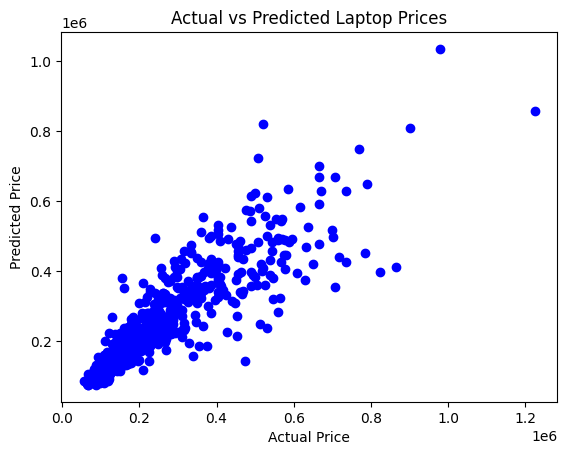

In [55]:
plt.scatter(y_test, y_pred_best, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()


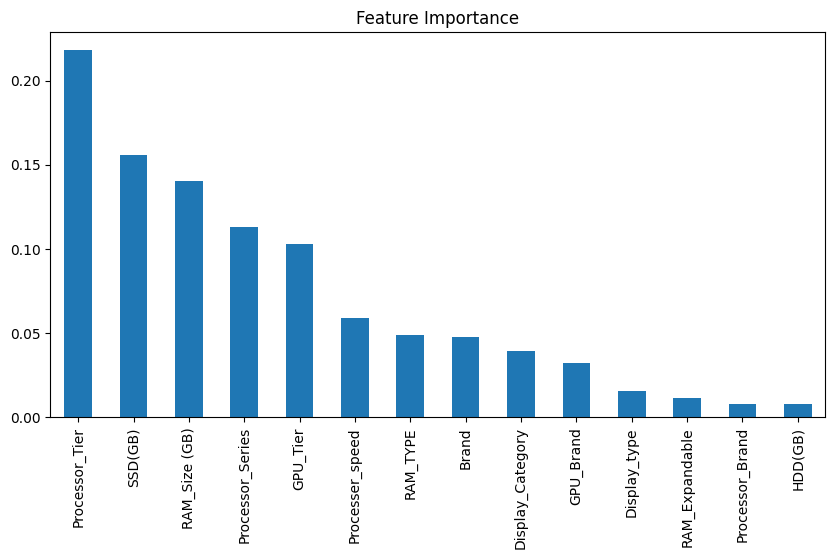

In [56]:
importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importance.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()


In [ ]:
# import joblib
# joblib.dump(best_rf, "laptop_price_rf_model.pkl")


['laptop_price_rf_model.pkl']